In [45]:

#Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [46]:
data=pd.read_csv('insurance.csv')

In [47]:
#Let's just print the First 5 rows to get an overview of how the Data Looks
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
#isnull function is used to check if there is any null values in Dataset and counting null values if there is any.
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [49]:
#Check the type of data in the Dataset field,we can see that the Dataset contains both numerical and categorical values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Since Dataset is of Numerical and Categorical Data, Let's convert categorical values into Numerical for easy computing and Extract Information on the Dataset. Before that Let's find out what are the Unique values in categorical Columns

In [7]:
categorical=['sex','smoker','region']

for col in categorical:
    print(col,'Column has {} as unique values'.format(data[col].unique()))

sex Column has ['female' 'male'] as unique values
smoker Column has ['yes' 'no'] as unique values
region Column has ['southwest' 'southeast' 'northwest' 'northeast'] as unique values


In [8]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

for col in categorical:
    Le.fit(data[col].drop_duplicates())
    data[col]=Le.transform(data[col])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


The Dataset is now converted into Numerical Data

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [10]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Let's Find the Descriptive statistics of the Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6888093a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f68827a1a58>]], dtype=object)

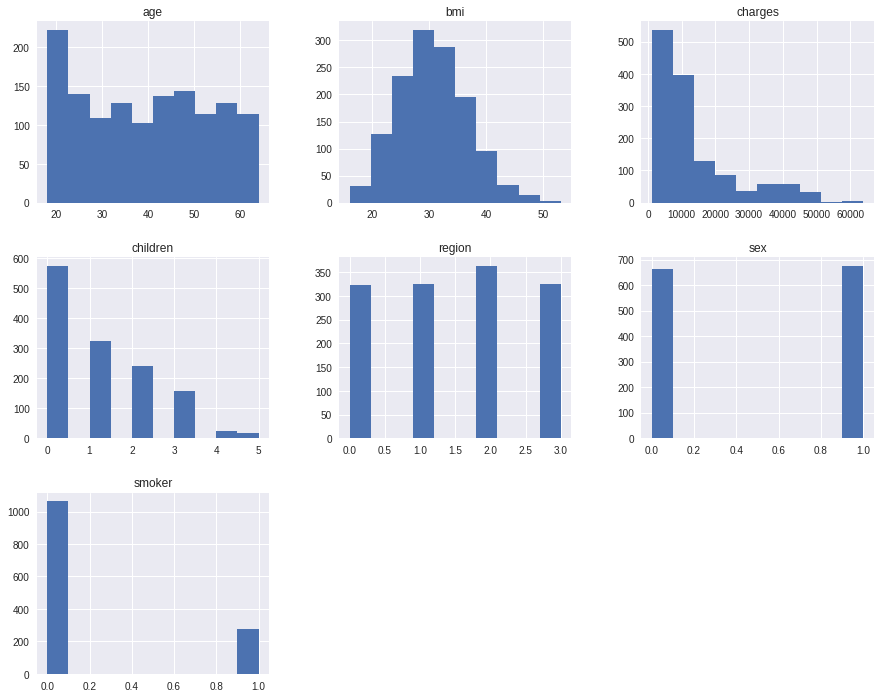

In [11]:
data.hist(figsize=(15,12))


by histogram we can get to know the Distribution of the data for each column

In [12]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


The Correlation function corr() computes pairwaise correlation of each column,The values ranges from -1 to +1 where -1 indicates it is higly negativel correlated which has zero effect on the outcome whereas +1 indicates the data is higly possitively correlated which means, the outcome is higly dependent on that Variable.

Correlation function plotted with heatmap

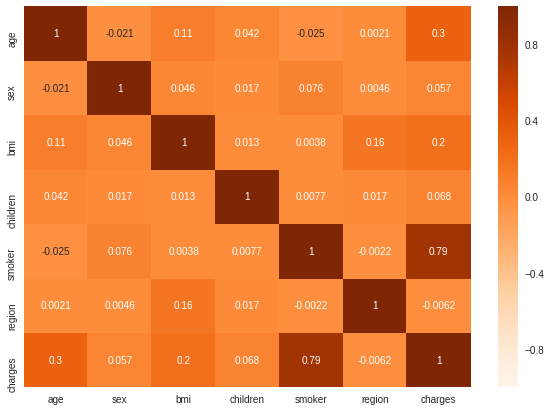

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='Oranges',linecolor='black')

By the heatmpa figure we can see that charges and smoker are higly correlated which means that the people who smokes end up in hospital paying high charges for treatment.

whereas the age and bmi body mass index is slightly correlated by which we can believe that, the charges varies depending on the age of the people

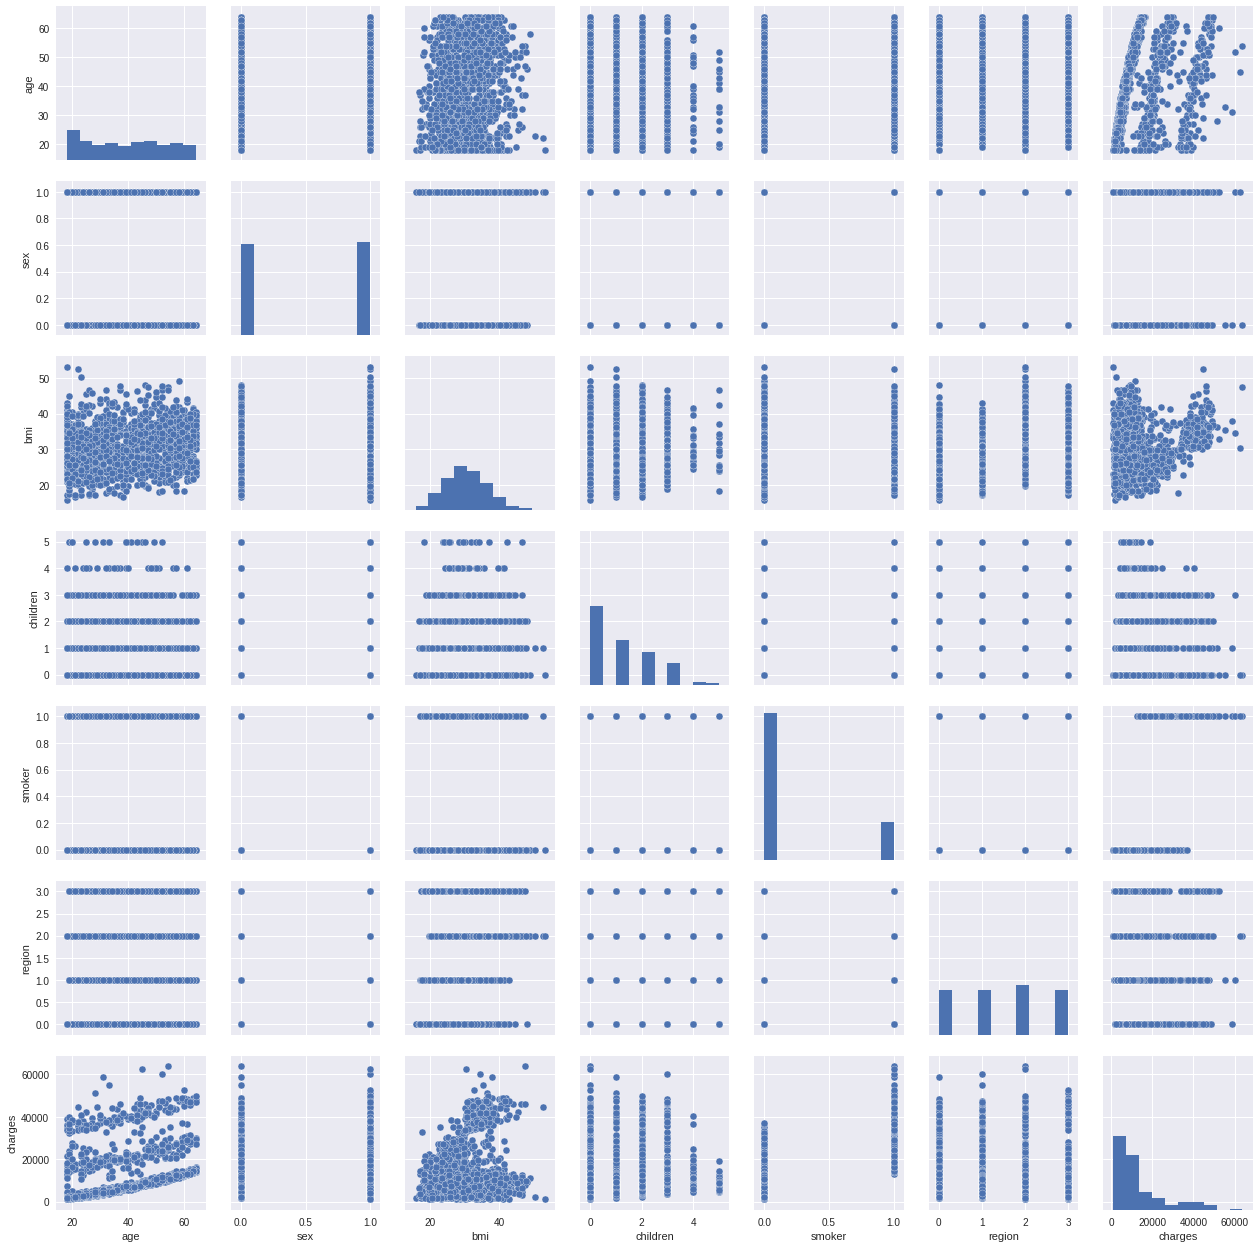

In [14]:
sns.pairplot(data)

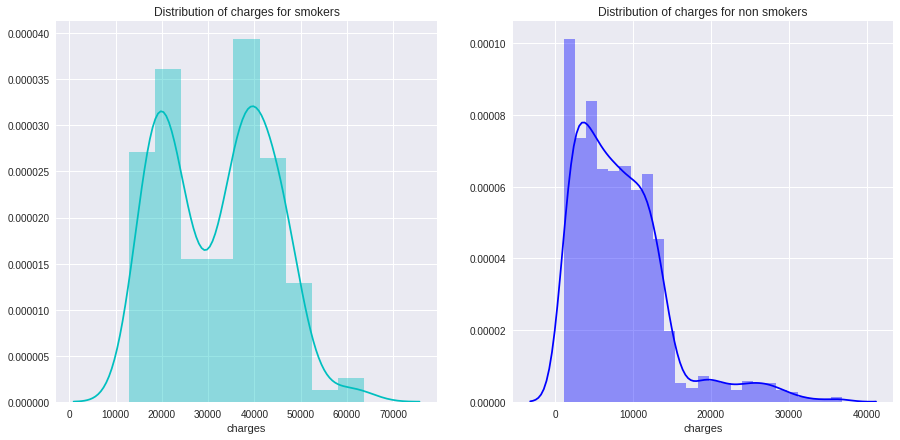

In [16]:
#plot distribution of charges for smokers
f=plt.figure(figsize=(15,7))
ax=f.add_subplot(121)
sns.distplot(data[data.smoker==1]['charges'],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

#plot distribution of charges for non smokers
ax=f.add_subplot(122)
sns.distplot(data[data.smoker==0]['charges'],color='b')
ax.set_title('Distribution of charges for non smokers')

The charges for smokers is quite high as compared with non smokers.

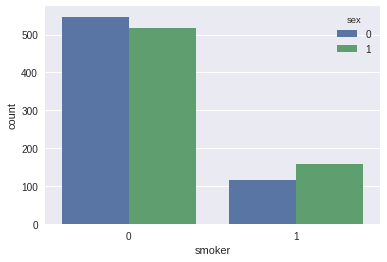

In [17]:
sns.countplot(x='smoker',hue='sex',data=data)

sex:
male=1

female=0

smoker:
smoker=1

non-smoker=0

count of male smokers is quite high as compared with female smokers

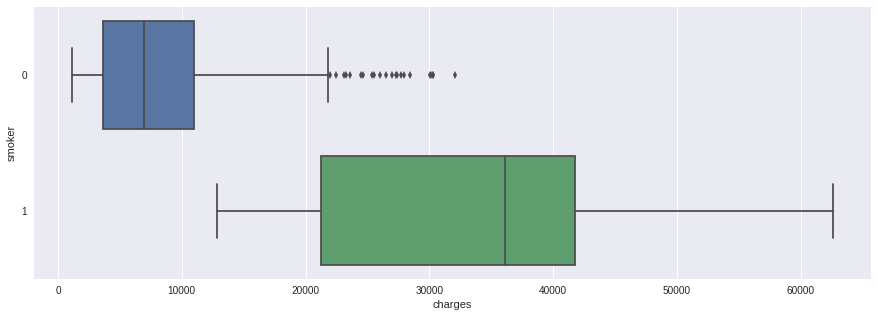

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x='charges',y='smoker',data=data[data.sex==1],orient='h')

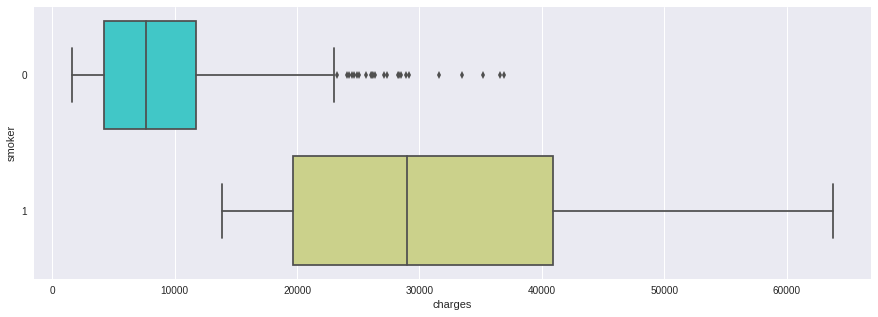

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(x='charges',y='smoker',data=data[data.sex==0],orient='h',palette='rainbow')

The Median Charges for Male is Higher as compared with Female Smokers.

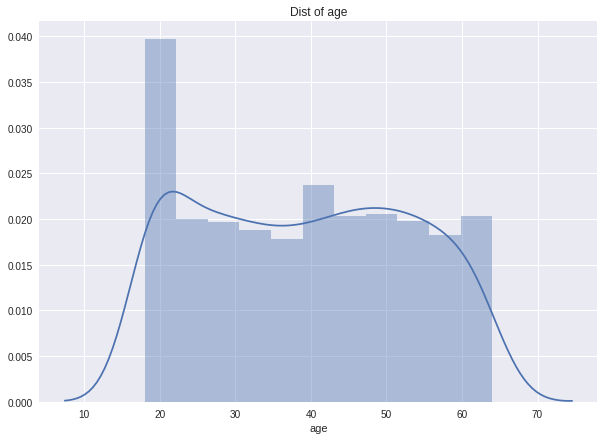

In [23]:
plt.figure(figsize=(10,7))
plt.title('Dist of age')
sns.distplot(data['age'])

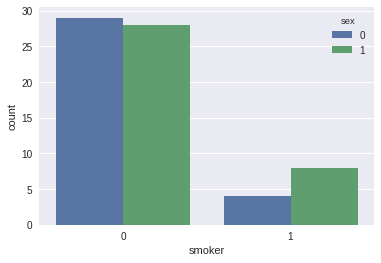

In [24]:
#Count of smokers who are exactly 18 years old 
sns.countplot(x='smoker',hue='sex',data=data[data['age']==18])

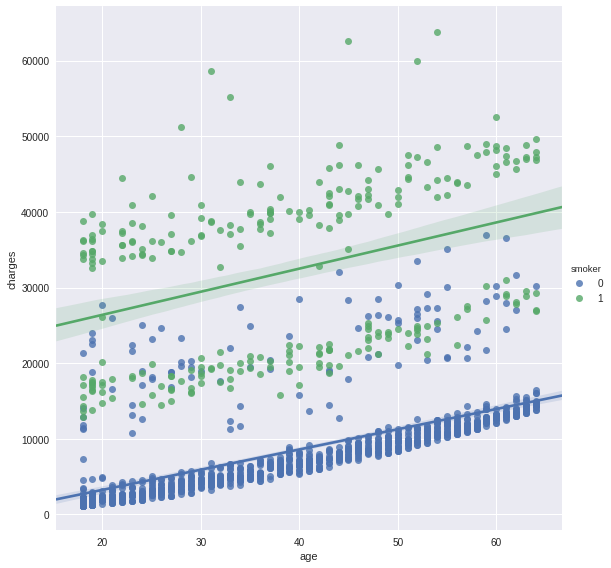

In [25]:
sns.lmplot(x='age',y='charges',hue='smoker',data=data,size=8)

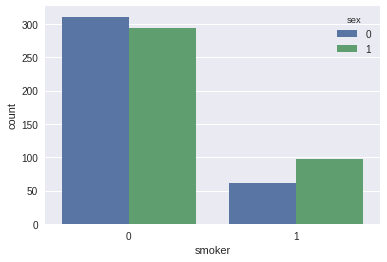

In [26]:
#Count of People who has Children and Smokes
sns.countplot(x='smoker',hue='sex',data=data[data.children>0])

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [28]:
#Train the Model with Linear Regression and check the accuracy

X=data.drop(['charges'],axis=1)
y=data.charges

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# std=StandardScaler()
# X_train=std.fit_transform(X_train)
# X_test=std.transform(X_test)


lr=LinearRegression()
lr.fit(X_train,y_train)
test=lr.predict(X_test)
r2_score(y_test,test)

0.79627320597257856

In [29]:
from sklearn.linear_model import Ridge,Lasso

for alpha in [0.0001,0.001,0.01,0.1,1,10,100]:
    Rid=Ridge(alpha=alpha).fit(X_train,y_train)
    rid_test=Rid.predict(X_test)
    print('Accuracy scorer for alpha {} is '.format(alpha),r2_score(y_test,rid_test))

Accuracy scorer for alpha 0.0001 is  0.796273178783
Accuracy scorer for alpha 0.001 is  0.796272934061
Accuracy scorer for alpha 0.01 is  0.79627048494
Accuracy scorer for alpha 0.1 is  0.79624580368
Accuracy scorer for alpha 1 is  0.795980231668
Accuracy scorer for alpha 10 is  0.791671695709
Accuracy scorer for alpha 100 is  0.692168341142


In [30]:
#Training the model with Lasso with different alpha values
for alpha in [0.0001,0.001,0.01,0.1,1,10,100]:
    Las=Lasso(alpha=alpha).fit(X_train,y_train)
    las_test=Las.predict(X_test)
    print('Accuracy scorer for alpha {} is '.format(alpha),r2_score(y_test,las_test))

Accuracy scorer for alpha 0.0001 is  0.796273205251
Accuracy scorer for alpha 0.001 is  0.796273198765
Accuracy scorer for alpha 0.01 is  0.796273134144
Accuracy scorer for alpha 0.1 is  0.796272492442
Accuracy scorer for alpha 1 is  0.796265918498
Accuracy scorer for alpha 10 is  0.796141223657
Accuracy scorer for alpha 100 is  0.794471321076


Best accuracy is 79 when compared with Liner models, Let's check with Different Models

We can increase the number of features by applying polynomial features with the required degree, Which generates a new feature matrix of polynomial combination.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(2)

poly_train=poly.fit_transform(X_train)
poly_test=poly.transform(X_test)


In [32]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor()
tree.fit(poly_train,y_train)
train_predict=tree.predict(poly_train)
print('train_score',r2_score(y_train,train_predict))
tree_test_result=tree.predict(poly_test)
print('test_score',r2_score(y_test,tree_test_result))


train_score 0.999454791644
test_score 0.628386059595


The model is Overfitting, We can apply gridsearchCV method to find the best parameters for the model

In [33]:
from sklearn.model_selection import GridSearchCV

parameters=[{'min_samples_split':[2,5,15,25,50,60,70,80,100],'criterion':['mse','friedman_mse','mae']}]

grid=GridSearchCV(estimator=tree,param_grid=parameters,cv=10,n_jobs=-1)

grid=grid.fit(X_train,y_train)

In [34]:
grid.best_score_

0.82474950971149208

In [35]:
grid.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=70,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(min_samples_split=30,criterion='mae')
tree.fit(poly_train,y_train)
tree_test_result=tree.predict(poly_test)
print('test_score',r2_score(y_test,tree_test_result)*100)


test_score 89.3270424325


In [40]:
from sklearn.tree import DecisionTreeRegressor

spl=[]
sco=[]
for split in [2,5,10,20,30,40,50,100,150,200,300]:
    tree=DecisionTreeRegressor(min_samples_split=split,criterion='mae')
    tree.fit(poly_train,y_train)
    tree_test_result=tree.predict(poly_test)
    test_score=r2_score(y_test,tree_test_result)
    spl.append(split)
    sco.append(test_score)


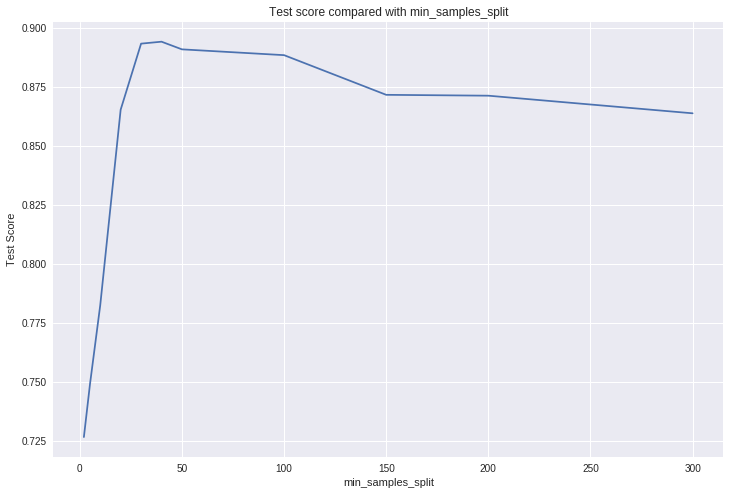

In [41]:
plt.figure(figsize=(12,8))
plt.plot(spl,sco)
plt.title('Test score compared with min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Test Score')

From the figure we can see that as the min_samples_split is increased the test score is increased after 40 min_samples_split the tests score result starts decreasing